# Fine Foods reviews analysis

This project is for performing sentiment analysis of Fine Foods reviews from Amazon.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fine_foods = pd.read_csv("Reviews.csv")

## Columns:
- <b>ProductId</b>: ID of reviewed product
- <b>UserId	</b>: ID of the user who wrote the review
- <b>ProfileName</b>: Name of the user who wrote the review
- <b>HelpfulnessNumerator</b>: Number of people, who think that review is helpful
- <b>HelpfulnessDenominator</b>: Number of people, who rated helpfulness of this review
- <b>Score</b>: Numeric score review of product
- <b>Time</b>: Time, when review was written
- <b>Summary</b>: Short summary of text review
- <b>Text</b>: Full text review, which is going to be analysed

In [3]:
fine_foods.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001PQNV6S,A3CGRPO7S8OQCA,Allison Abbe,0,0,1,1203292800,Not good,I ordered these for my son (age 11). He doesn'...
1,B001OCKIP0,A1QTHVA826XEOS,Super Mum,0,0,5,1245801600,Great enough to eat plain!,Sure you could put it in milk and eat it like ...
2,B0088YBUOU,A11NFERETUWA8Z,"Richard T. Toohey ""Army man 2e""",10,11,1,1263427200,Over Rated (way over priced)Frozen meats,For christmas I ordered some coupons from my d...
3,B003P02EX8,AO7OI98T0OOBE,muir,3,3,5,1336435200,Flavors are fine (actually good),I read a bunch of reviews questioning the tast...
4,B002T012EC,A9629MBK9W9LP,april,0,0,1,1326326400,Most of the box was broken,When I opened the box most of the tart shells ...


Full data frame presents as above. Now it's time to remove columns that do not contain any useful data for this problem.

In [4]:
fine_foods.drop(['UserId', 'ProfileName', 'Time', 'Summary'], axis=1, inplace=True)
fine_foods

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Text
0,B001PQNV6S,0,0,1,I ordered these for my son (age 11). He doesn'...
1,B001OCKIP0,0,0,5,Sure you could put it in milk and eat it like ...
2,B0088YBUOU,10,11,1,For christmas I ordered some coupons from my d...
3,B003P02EX8,3,3,5,I read a bunch of reviews questioning the tast...
4,B002T012EC,0,0,1,When I opened the box most of the tart shells ...
...,...,...,...,...,...
49995,B002AN4KQA,0,0,4,My dog loves this toy but there are somethings...
49996,B0028H1GC4,1,1,5,This tea is wonderful. The flavor is delicious...
49997,B003WKJW5Y,2,2,5,After doing lots of research regarding the bes...
49998,B0040MKNTW,1,1,3,My 1 year old Weimaraner loves the the taste o...


Below, I printed some examples of text data, which will be processed in further operations.

In [5]:
print(fine_foods['Text'][0])
print()
print(fine_foods['Text'][1])
print()
print(fine_foods['Text'][2])

I ordered these for my son (age 11). He doesn't like them at all. I thought they would be similar to the Kinnikinnick cookies we get at our local health food store, but they're not. These are rock hard and although sugary, otherwise have no flavor. We'll stick with the Kinnikinnicks. I'm just hoping maybe I can use these for making a cookie crumb crust.

Sure you could put it in milk and eat it like cereal, sprinkle it as a topping on ice cream or fro-yo, but it is perfect enough to snack right out of the bag.  I love how sweet it is.  I am not a fan of dry-barely-sweet granola but the gooey sugary stuff marketed toward children isn't great either (I'd rather eat a cookie or cake).  This hits that midpoint that is perfect when craving a sweet snack (without going for a full-fledged dessert).  The chocolate is perfect and sweet without being bitter like found in many healthier snacks.<br /><br />Nice perk... the zipper closure at the top.  I can never seem to find a "Chip Clip" in my ho

## Preprocessing the text data

Text data are going to be processed by the Normalize class, which I create to perform such operations as removing HTML tags, non ASCII characters, punctuation, stop words, changing letter to lower case, changing numbers to words and performing lemmatization.

In the next step, the data will be labaled as positive and negative using 'Score' column.

In [6]:
from preprocessing import Normalize

normalize = Normalize()
tokens = list()
labels = list()

for index, row in fine_foods.iterrows():
    review = row['Text']
    rating = row['Score']
    tokens.append(normalize.normalize(review))
    labels.append(int(rating > 3))
    
tokens = np.asarray(tokens)
labels = np.asarray(labels)

### Words count comparision

Plot below presents comparision between word count in the positive and the negative reviews.

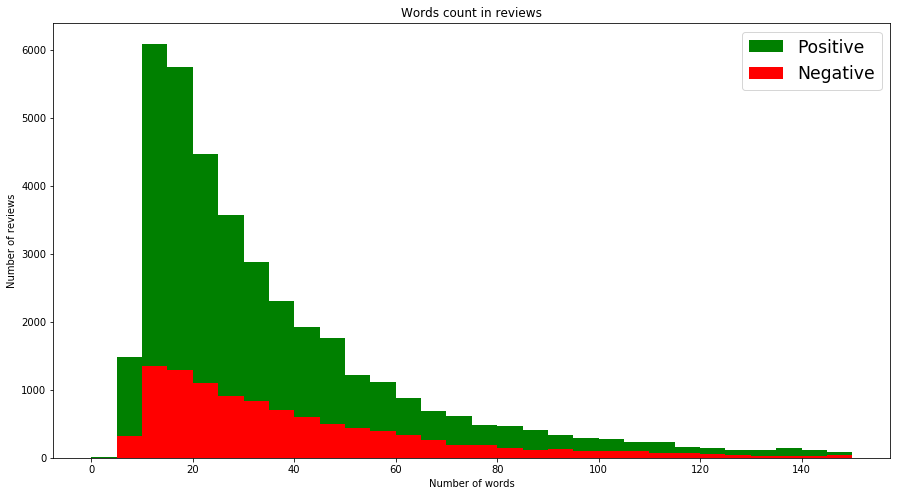

In [7]:
postive_count = [len(review[0].split()) for review in tokens[np.argwhere(labels == 1)]]
negative_count = [len(review[0].split()) for review in tokens[np.argwhere(labels == 0)]]

plt.figure(figsize=(15,8))
plt.hist(postive_count, range=(0, 150), bins=30, label='Positive', color='g')
plt.hist(negative_count, range=(0, 150), bins=30, label='Negative', color='r')
plt.legend(fontsize='xx-large')
plt.title('Words count in reviews')
plt.ylabel('Number of reviews')
plt.xlabel('Number of words')
plt.show()

### Helpfulness rating

The chart below shows how other people rate certain reviews as helpful or not. As we can see, most positive reviews are marked as helpful. On the other hand, the result of negative reviews has a more balanced distribution.

In [8]:
helpfulness_positive = list()
helpfulness_negative = list()

for index, row in fine_foods.iterrows():
    numerator = float(row['HelpfulnessNumerator'])
    denominator = float(row['HelpfulnessDenominator'])
    
    if denominator > 0:
        helpfulness = numerator / denominator
        if int(row['Score']) > 3:
            helpfulness_positive.append(helpfulness)
        else:
            helpfulness_negative.append(helpfulness)

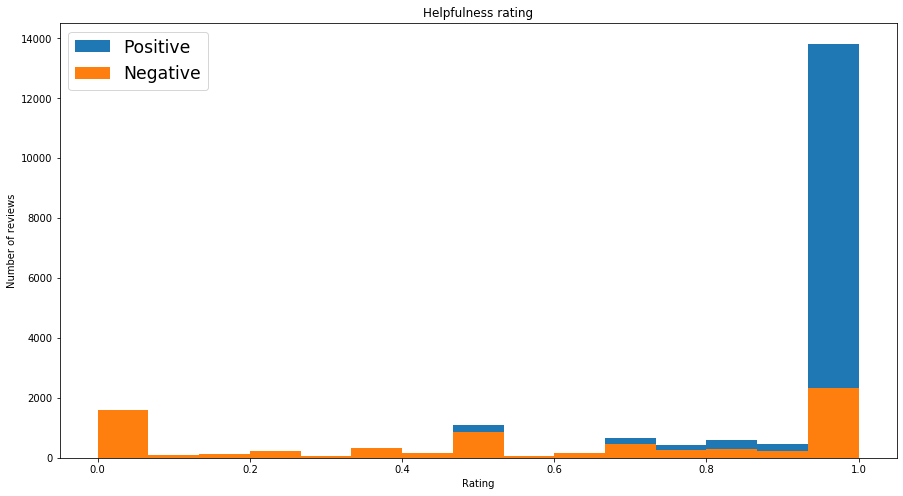

In [9]:
plt.figure(figsize=(15,8))
plt.hist(helpfulness_positive, range=(0, 1), bins=15, label='Positive')
plt.hist(helpfulness_negative, range=(0, 1), bins=15, label='Negative')
plt.title('Helpfulness rating')
plt.ylabel('Number of reviews')
plt.xlabel('Rating')
plt.legend(fontsize='xx-large')
plt.show()

## Word clouds

Chart below presents word clouds for every review in the dataset. The bigger the word is, the more times it appears in the dataset.

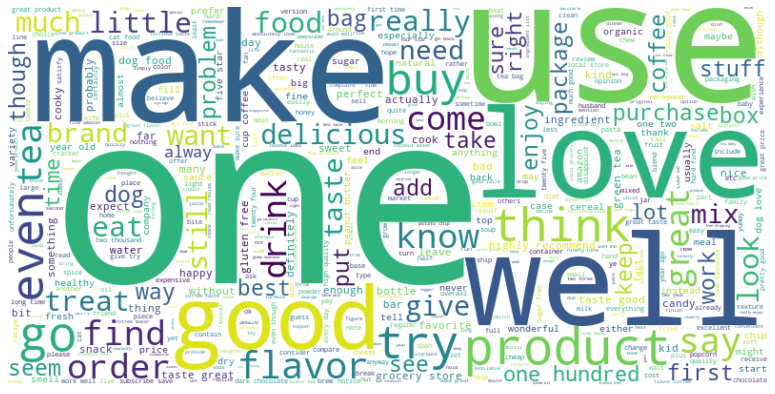

In [10]:
from wordcloud import WordCloud

text = " ".join(words for words in tokens)
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=500)
wordcloud.generate(text)

plt.figure(figsize=[15,7])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Positive reviews word cloud

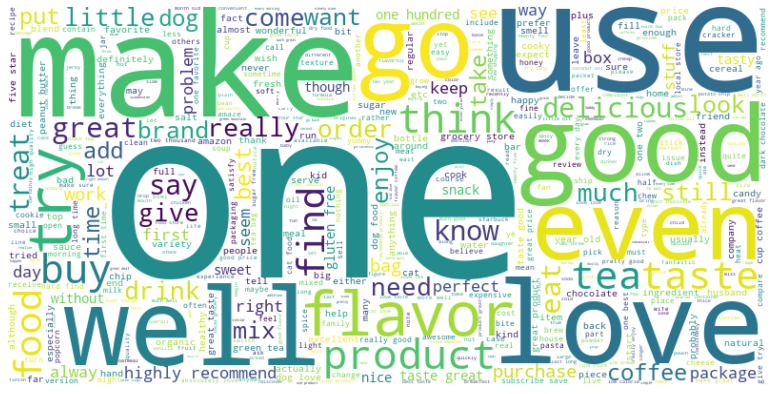

In [11]:
text = " ".join(words[0] for words in tokens[np.argwhere(labels == 1)])
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=500)
wordcloud.generate(text)

plt.figure(figsize=[15,7])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Negative reviews word cloud

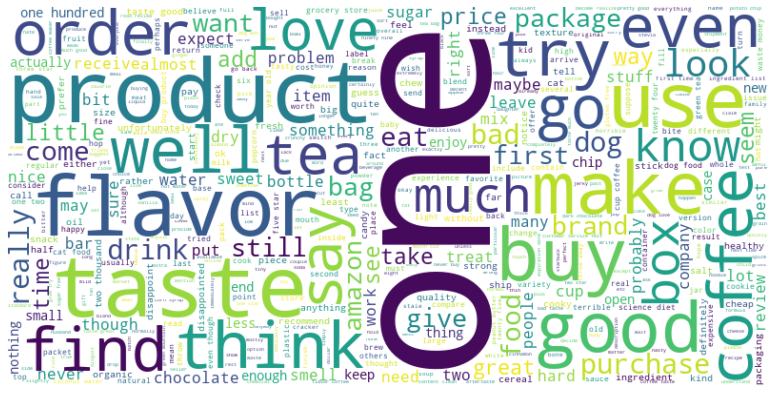

In [12]:
text = " ".join(words[0] for words in tokens[np.argwhere(labels == 0)])
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=500)
wordcloud.generate(text)

plt.figure(figsize=[15,7])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Representing words as vectors

In [13]:
from sklearn.model_selection import train_test_split

tokens_train, tokens_test, labels_train, labels_test = train_test_split(tokens, labels, stratify=labels, test_size=0.3)

After train-test split, the words will be used to create the TF-IDF matrix.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vectorizer = CountVectorizer(strip_accents=None, lowercase=False, analyzer='word', min_df=0.1, max_df=0.9)
transformer = TfidfTransformer()

vect_train = vectorizer.fit_transform(tokens_train)
vect_test = vectorizer.transform(tokens_test)

tfidf_train = transformer.fit_transform(vect_train)
tfidf_test = transformer.transform(vect_test)

## Finding best models

#### I permorming grid search with stratified k-fold on this particular algorithms:
- Logistic Regression
- SVC with linear kernel
- SVC with rbf kernel
- SVC with polynomial kernel
- Random Forest
- Decision Tree

In [15]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

kfold = StratifiedKFold(n_splits=5)

In [16]:
param_grid = {'C': [0.01, 0.1, 1, 10]}

grid_1 = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=kfold, return_train_score=True)

grid_1.fit(tfidf_train, labels_train)
grid_1.best_params_

{'C': 0.1}

In [17]:
param_grid = {'C': [0.01, 0.1, 1, 10]}

grid_2 = GridSearchCV(SVC(kernel='linear'), param_grid, cv=kfold, return_train_score=True)

grid_2.fit(tfidf_train, labels_train)
grid_2.best_params_

{'C': 0.01}

In [18]:
param_grid = {'C': [0.01, 0.1, 1, 10],
              'gamma': [0.01, 0.1, 1, 10]}

grid_3 = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=kfold, return_train_score=True)

grid_3.fit(tfidf_train, labels_train)
grid_3.best_params_

{'C': 10, 'gamma': 10}

In [19]:
param_grid = {'n_estimators': [50, 100, 150, 200, 300]}

grid_4 = GridSearchCV(AdaBoostClassifier(), param_grid, cv=kfold, return_train_score=True)

grid_4.fit(tfidf_train, labels_train)
grid_4.best_params_

{'n_estimators': 150}

In [20]:
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [10, 25, 50]}

grid_5 = GridSearchCV(RandomForestClassifier(), param_grid, cv=kfold, return_train_score=True)

grid_5.fit(tfidf_train, labels_train)
grid_5.best_params_

{'max_depth': 50, 'n_estimators': 200}

In [21]:
param_grid = {'splitter': ['best', 'random'],
              'max_depth': [10, 25, 50, 100, 200]}

grid_6 = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=kfold, return_train_score=True)

grid_6.fit(tfidf_train, labels_train)
grid_6.best_params_

{'max_depth': 200, 'splitter': 'best'}

## Predictions and measuring different scores

Here, I am measuring different types of scores for every trained model. This loop is also responsible for counting the number of reviews from each label predicted by a given model.

In [22]:
from sklearn import metrics

models = list()
models.append(('Logistic Regression', grid_1.best_estimator_))
models.append(('SVC linear', grid_2.best_estimator_))
models.append(('SVC rbf', grid_3.best_estimator_))
models.append(('Ada Boost', grid_4.best_estimator_))
models.append(('Random forest', grid_5.best_estimator_))
models.append(('Decision tree', grid_6.best_estimator_))


precision_score = list()
recall_score = list()
f1_score = list()
accuracy_score = list()

positive_count = list()
negative_count = list()
names = list()

for name, model in models:
    predictions = model.predict(tfidf_test)
    
    precision_score.append(metrics.precision_score(labels_test, predictions))
    recall_score.append(metrics.recall_score(labels_test, predictions))
    f1_score.append( metrics.f1_score(labels_test, predictions))
    accuracy_score.append(metrics.accuracy_score(labels_test, predictions))
    
    positive_count.append(len(np.argwhere(predictions == 1)))
    negative_count.append(len(np.argwhere(predictions == 0)))
    names.append(name)

## Number of positive reviews predicted by each model

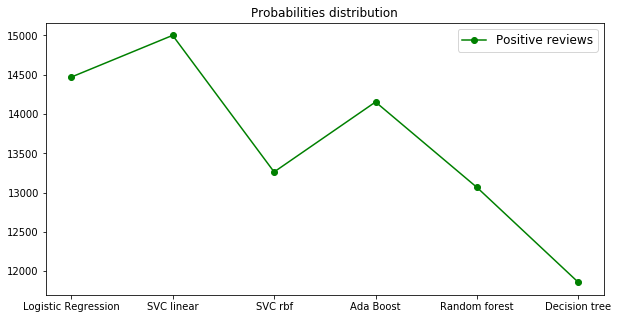

In [23]:
plt.figure(figsize=(10,5))
plt.plot(names, positive_count, marker='o', label='Positive reviews', color='g')
plt.title('Probabilities distribution')
plt.legend(fontsize='large')
plt.show()

## Number of negative reviews predicted by each model

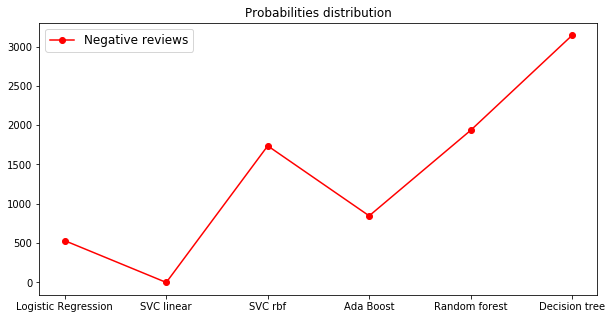

In [24]:
plt.figure(figsize=(10,5))
plt.plot(names, negative_count, marker='o', label='Negative reviews', color='r')
plt.title('Probabilities distribution')
plt.legend(fontsize='large')
plt.show()

## Probabilities distribution

This section show how look distribution of probabilities predicted by Logistic Regression. We can notice, that the algorithm was more sure about positive reviews than the negative ones.

In [25]:
probabilities = grid_1.predict_proba(tfidf_test)
probabilities_positive = list()
probabilities_negative = list()

for prob in probabilities:
    if prob[0] > prob[1]:
        probabilities_negative.append(prob[0])
    else:
        probabilities_positive.append(prob[1])

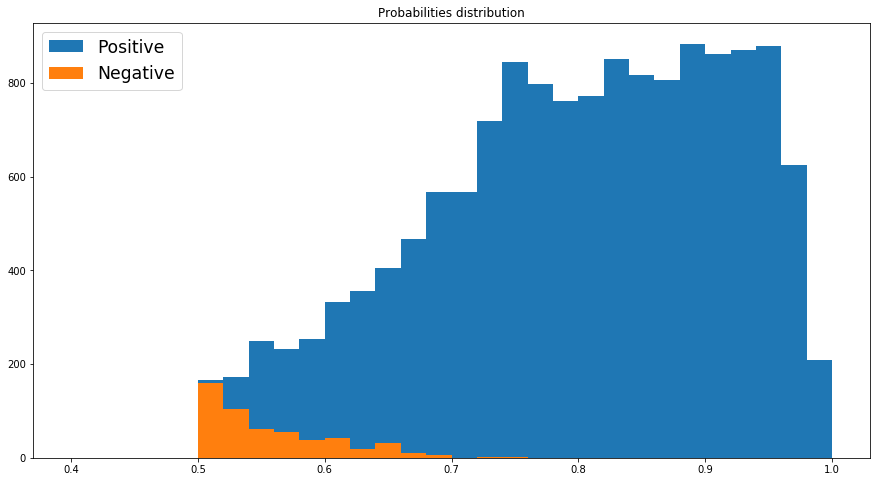

In [26]:
plt.figure(figsize=(15,8))
plt.hist(probabilities_positive, range=(0.4, 1), bins=30, label='Positive')
plt.hist(probabilities_negative, range=(0.4, 1), bins=30, label='Negative')
plt.title('Probabilities distribution')
plt.legend(fontsize='xx-large')
plt.show()

## Scores comparison

#### This table compares:
- Precision score
- Recall score
- F1 score
- Accuracy score

For every trained before model.

In [27]:
columns = {'precision_score': precision_score, 
           'recall_score': recall_score, 
           'f1_score': f1_score,
           'accuracy_score' : accuracy_score}

scores = pd.DataFrame(data=columns)
scores.insert(loc=0, column='Method', value=['LogisticRegression', 'SVC linear','SVC rbf', 'Ada Boost', 'Random forest', 'Decision tree'])
scores

,Method,precision_score,recall_score,f1_score,accuracy_score
0,LogisticRegression,0.796531,0.980267,0.878899,0.788267
1,SVC linear,0.783800,1.000000,0.878798,0.783800
2,SVC rbf,0.871447,0.983074,0.923901,0.873067
3,Ada Boost,0.804635,0.968614,0.879043,0.791067
4,Random forest,0.879075,0.976950,0.925432,0.876600
5,Decision tree,0.893658,0.901335,0.897480,0.838600
